In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
digits = load_digits()

In [3]:
type(digits)

sklearn.utils.Bunch

In [4]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [5]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [6]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [7]:
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [8]:
digits.frame

In [9]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [10]:
digits.data.shape

(1797, 64)

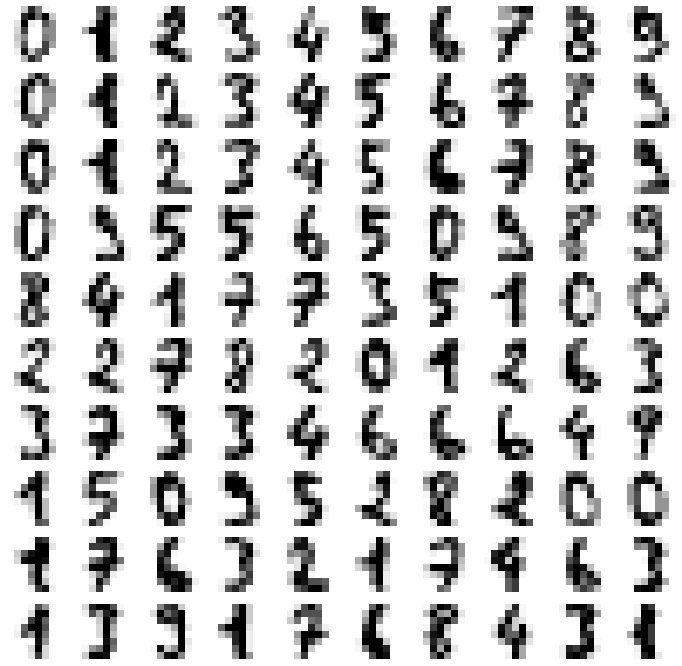

In [11]:
fig, axs = plt.subplots(10, 10, figsize=(12, 12))

for digit, target, ax in zip(digits.data, digits.target, axs.flatten()):
    image = digit.reshape(8, 8)
    ax.imshow(image, cmap=cm.Greys)
    ax.axis('off')

In [12]:
scaler = StandardScaler()

In [13]:
 X_scaled = scaler.fit_transform(digits.data)

In [14]:
from utils import mnist_reader

ImportError: cannot import name 'mnist_reader' from 'utils' (/Users/cp/opt/anaconda3/lib/python3.7/site-packages/utils/__init__.py)

In [15]:
# from application.app.folder.file import mnist_reader
from ntropy_assessment.utils.mnist_reader import load_mnist

ModuleNotFoundError: No module named 'ntropy_assessment'

In [16]:
import sys
# sys.path.append("/path/to/file/")  # path contains python_file.py
sys.path.append("~/Documents/dsi/ntropy_assessment/utils2")

import mnist_reader

ModuleNotFoundError: No module named 'mnist_reader'

In [17]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '~/Documents/dsi/ntropy_assessment/')

from utils2 import mnist_reader

ModuleNotFoundError: No module named 'utils2'

In [18]:
import sys  
sys.path.insert(0, '~/Documents/dsi/ntropy_assessment/')

from utils import mnist_reader

ImportError: cannot import name 'mnist_reader' from 'utils' (/Users/cp/opt/anaconda3/lib/python3.7/site-packages/utils/__init__.py)

In [19]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [20]:
# import mnist_reader
X_train, y_train = load_mnist('/Users/cp/Documents/dsi/ntropy_assessment/data/fashion', kind='train')
X_test, y_test = load_mnist('/Users/cp/Documents/dsi/ntropy_assessment/data/fashion', kind='t10k')

In [21]:
X_train.shape

(60000, 784)

In [22]:
y_train.shape

(60000,)

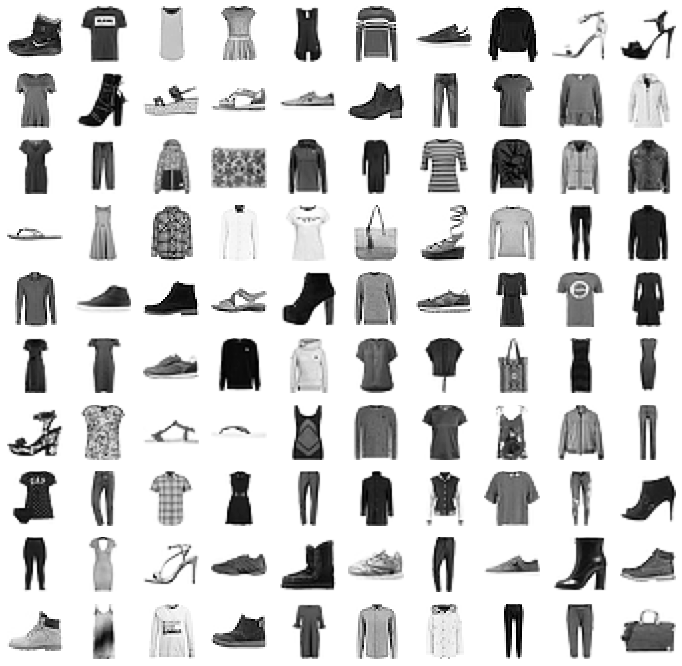

In [23]:
fig, axs = plt.subplots(10, 10, figsize=(12, 12))

for item, target, ax in zip(X_train, y_train, axs.flatten()):
    image = item.reshape(28, 28)
    ax.imshow(image, cmap=cm.Greys)
    ax.axis('off')

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [25]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

In [26]:
def scree_plot(ax, pca, n_components_to_plot=8, title=None):
    """Make a scree plot showing the variance explained (i.e. varaince of the projections) for the principal components in a fit sklearn PCA object.
    
    Parameters
    ----------
    ax: matplotlib.axis object
      The axis to make the scree plot on.
      
    pca: sklearn.decomposition.PCA object.
      A fit PCA object.
      
    n_components_to_plot: int
      The number of principal components to display in the skree plot.
      
    title: str
      A title for the skree plot.
    """
    num_components = pca.n_components_
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
    ax.plot(ind, vals, color='blue')
    ax.scatter(ind, vals, color='blue', s=50)

    for i in range(num_components):
        ax.annotate(r"{:2.2f}%".format(vals[i]), 
                   (ind[i]+0.2, vals[i]+0.005), 
                   va="bottom", 
                   ha="center", 
                   fontsize=12)

    ax.set_xticklabels(ind, fontsize=12)
    ax.set_ylim(0, max(vals) + 0.05)
    ax.set_xlim(0 - 0.45, n_components_to_plot + 0.45)
    ax.set_xlabel("Principal Component", fontsize=12)
    ax.set_ylabel("Variance Explained (%)", fontsize=12)
    if title is not None:
        ax.set_title(title, fontsize=16)

/Users/cp/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator


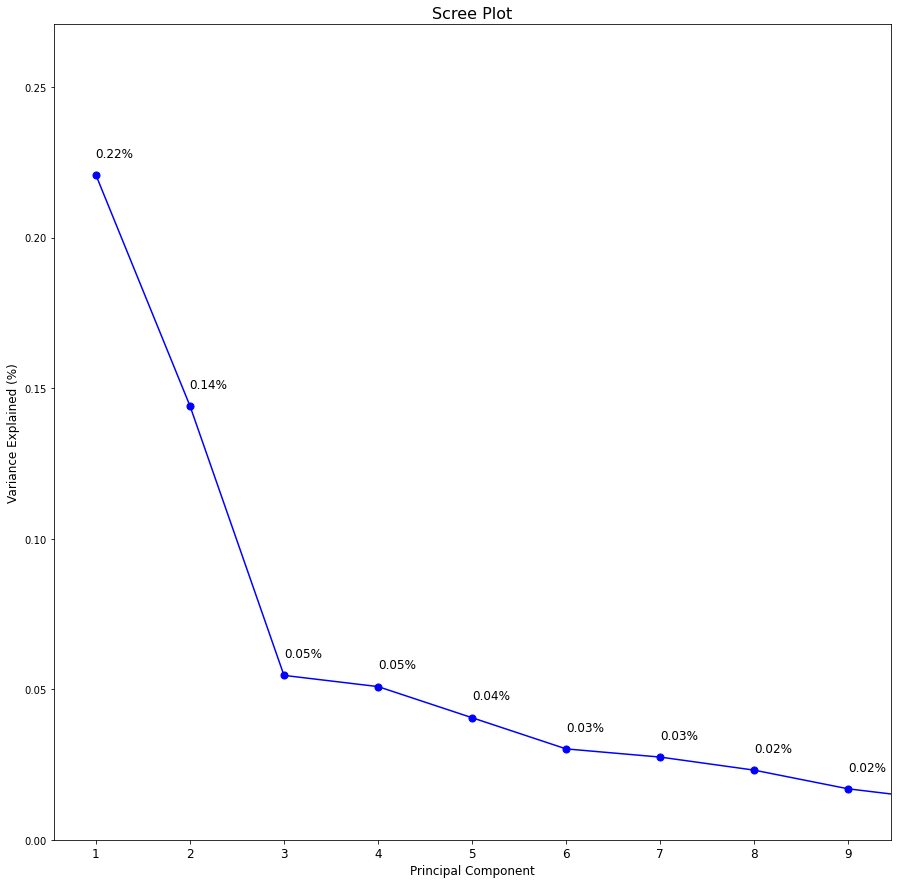

In [27]:
fig, ax = plt.subplots( figsize=(15, 15))
scree_plot(ax,pca,title='Scree Plot')
plt.show()

In [28]:
def plot_mnist_embedding(ax, X, y, title=None):
    """Plot an embedding of the mnist dataset onto a plane.
    
    Parameters
    ----------
    ax: matplotlib.axis object
      The axis to make the scree plot on.
      
    X: numpy.array, shape (n, 2)
      A two dimensional array containing the coordinates of the embedding.
      
    y: numpy.array
      The labels of the datapoints.  Should be digits.
      
    title: str
      A title for the plot.
    """
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    ax.axis('off')
    ax.patch.set_visible(False)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], 
                 str(digits.target[i]), 
                 color=plt.cm.Set1(y[i] / 10.), 
                 fontdict={'weight': 'bold', 'size': 12})

    ax.set_xticks([]), 
    ax.set_yticks([])
    ax.set_ylim([-0.1,1.1])
    ax.set_xlim([-0.1,1.1])

    if title is not None:
        ax.set_title(title, fontsize=16)

In [29]:
from sklearn import decomposition

In [30]:
pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

IndexError: index 1797 is out of bounds for axis 0 with size 1797

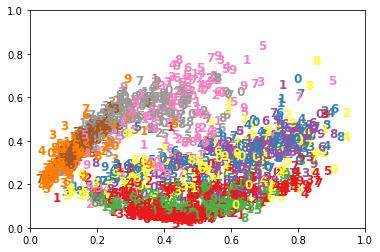

In [31]:
plot_mnist_embedding(ax,X_pca,y_train)
plt.show()

In [32]:
from sklearn.cluster import MiniBatchKMeans
total_clusters = len(np.unique(y_test))
# Initialize the K-Means model
kmeans = MiniBatchKMeans(n_clusters = total_clusters)
# Fitting the model to training set
kmeans.fit(X_train)


MiniBatchKMeans(n_clusters=10)

In [33]:
kmeans.labels_

array([8, 4, 1, ..., 0, 1, 6], dtype=int32)

In [34]:
def retrieve_info(cluster_labels,y_train):

# Initializing
    reference_labels = {}
    # For loop to run through each label of cluster label
    for i in range(len(np.unique(kmeans.labels_))):
        index = np.where(cluster_labels == i,1,0)
        num = np.bincount(y_train[index==1]).argmax()
        reference_labels[i] = num
    return reference_labels

In [35]:
reference_labels = retrieve_info(kmeans.labels_,y_train)


In [36]:
reference_labels

{0: 3, 1: 6, 2: 8, 3: 9, 4: 0, 5: 2, 6: 7, 7: 4, 8: 9, 9: 1}

In [37]:
number_labels = np.random.rand(len(kmeans.labels_))

for i in range(len(kmeans.labels_)):

  number_labels[i] = reference_labels[kmeans.labels_[i]]

In [38]:
print(number_labels[:20].astype('int'))
print(y_train[:20])

[9 0 6 3 3 2 7 2 6 6 0 9 7 7 7 9 3 0 2 6]
[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4]


In [39]:
(y_train == number_labels).sum()

31315

In [40]:
from sklearn.metrics import accuracy_score

print(accuracy_score(number_labels,y_train))

0.5219166666666667


In [41]:
def calculate_metrics(model,output):
  
  print(f'Number of clusters is {model.n_clusters}')
  print(f'Inertia : {model.inertia_}')
  print(f'Homogeneity : {metrics.homogeneity_score(output,model.labels_)}')

In [42]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

cluster_number = [10,16,36,64,144,256, 350, 425]

for i in cluster_number:

  
  total_clusters = len(np.unique(y_test))


 # Initialize the K-Means model

  kmeans = MiniBatchKMeans(n_clusters = i)

# Fitting the model to training set

  kmeans.fit(X_train)

# Calculating the metrics
   
  calculate_metrics(kmeans,y_train)

# Calculating reference_labels

  reference_labels = retrieve_info(kmeans.labels_,y_train)

# 'number_labels' is a list which denotes the number displayed in image

  number_labels = np.random.rand(len(kmeans.labels_))

  for i in range(len(kmeans.labels_)):
    
    number_labels[i] = reference_labels[kmeans.labels_[i]]
  
  print('Accuracy score : {}'.format(accuracy_score(number_labels,y_train)))

  print('\n')

Number of clusters is 10
Inertia : 126366560575.20245
Homogeneity : 0.47875483239348
Accuracy score : 0.4933666666666667


Number of clusters is 16
Inertia : 110590843287.25928
Homogeneity : 0.576512941651528
Accuracy score : 0.64395


Number of clusters is 36
Inertia : 94636388057.59128
Homogeneity : 0.6346943433313474
Accuracy score : 0.6733833333333333


Number of clusters is 64
Inertia : 85757640637.05447
Homogeneity : 0.6775477023254307
Accuracy score : 0.7193666666666667


Number of clusters is 144
Inertia : 76030728254.10565
Homogeneity : 0.7169805199708524
Accuracy score : 0.7465833333333334


Number of clusters is 256
Inertia : 70463279398.2789
Homogeneity : 0.7427294264316543
Accuracy score : 0.7718


Number of clusters is 350
Inertia : 67158752023.32153
Homogeneity : 0.7596138367381646
Accuracy score : 0.7916666666666666


Number of clusters is 425
Inertia : 65816912381.336105
Homogeneity : 0.7636226648573851
Accuracy score : 0.7902333333333333




In [43]:
kmeans = MiniBatchKMeans(n_clusters = 256)

# Fitting the model to testing set

kmeans.fit(X_test)

# Calculating the metrics

calculate_metrics(kmeans,y_test)

# Calculating the reference_labels

reference_labels = retrieve_info(kmeans.labels_,y_test)

# 'number_labels' is a list which denotes the number displayed in image

number_labels = np.random.rand(len(kmeans.labels_))

for i in range(len(kmeans.labels_)):
     
    number_labels[i] = reference_labels[kmeans.labels_[i]]
  
print('Accuracy score : {}'.format(accuracy_score(number_labels,y_test)))

print('\n')

Number of clusters is 256
Inertia : 11515584036.140415
Homogeneity : 0.7445593757835994
Accuracy score : 0.7656




In [44]:
centroids = kmeans.cluster_centers_

In [45]:
centroids.shape

(256, 784)

In [46]:
centroids = centroids.reshape(256,28,28)

In [47]:
centroids.shape

(256, 28, 28)

In [48]:
centroids = centroids * 255

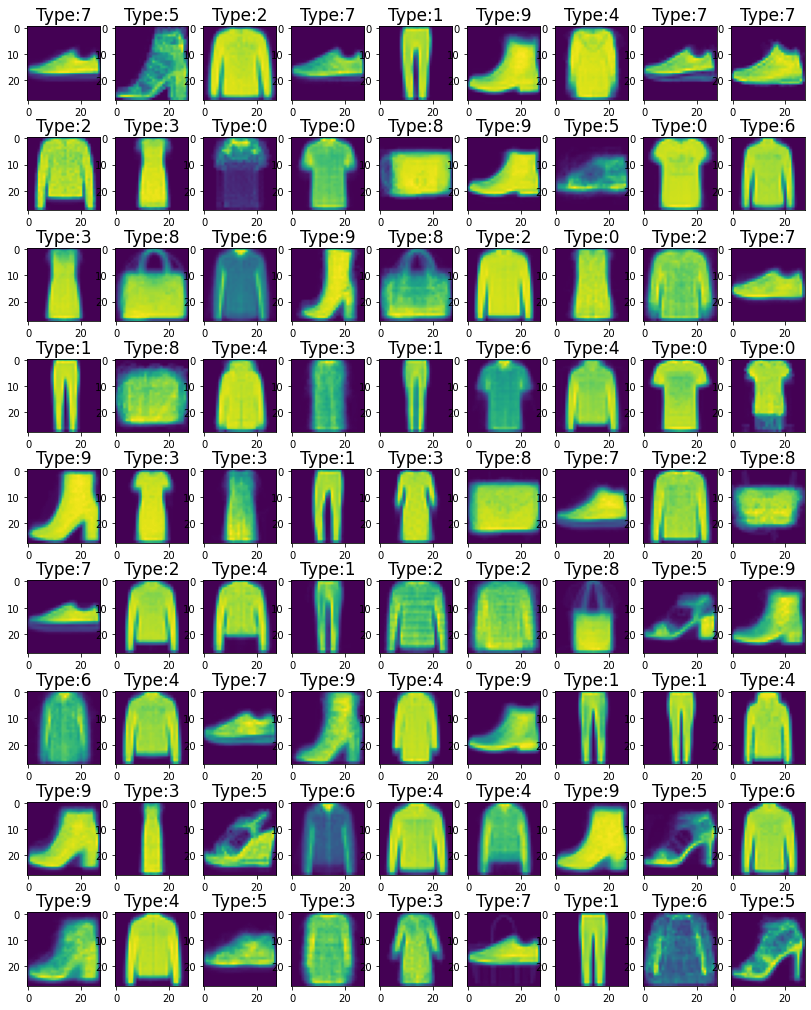

In [49]:
plt.figure(figsize = (18,18))

bottom = 0.30

for i in range(81):
  plt.subplots_adjust(bottom)
  plt.subplot(9,9,i+1)
  plt.title('Type:{}'.format(reference_labels[i]),fontsize = 17)
  plt.imshow(centroids[i])

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

In [50]:
from sklearn.metrics import plot_confusion_matrix

In [51]:
plot_confusion_matrix(kmeans, X_test, y_test)  

/Users/cp/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


ValueError: plot_confusion_matrix only supports classifiers

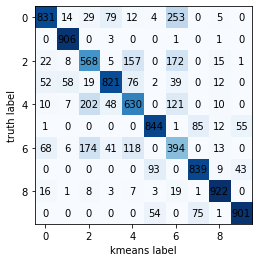

In [54]:
# Compute confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(number_labels, y_test)

# Plot confusion matrix
plt.imshow(cm,interpolation='none',cmap='Blues')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("kmeans label")
plt.ylabel("truth label")
plt.savefig('confusion_matrix.png', dpi =300)
plt.show()

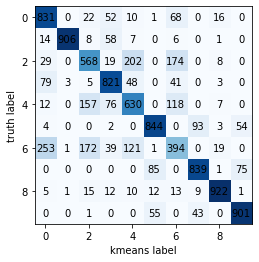

In [53]:
# # Compute confusion matrix
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test,number_labels)

# # Plot confusion matrix
# plt.imshow(cm,interpolation='none',cmap='Blues')
# for (i, j), z in np.ndenumerate(cm):
#     plt.text(j, i, z, ha='center', va='center')
# plt.xlabel("kmeans label")
# plt.ylabel("truth label")
# plt.show()